In [1]:
# https://github.com/IntelRealSense/librealsense/blob/jupyter/notebooks/distance_to_object.ipynb

In [46]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt
%matplotlib inline
# 2D plotting library producing publication quality figures
import pyrealsense2 as rs

# !pip install opencv-python
# !pip install pyrealsense2
FPS = 60
# Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


In [52]:
!python --version

Python 3.8.5


Frames Captured


NameError: name 'pc' is not defined

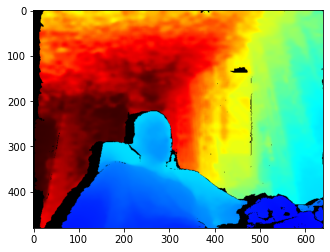

In [51]:
# Setup:
pipeline = rs.pipeline()
config = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipeline)
pipeline_profile = config.resolve(pipeline_wrapper)
device = pipeline_profile.get_device()
device_product_line = str(device.get_info(rs.camera_info.product_line))

config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, FPS)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, FPS)

pipeline.start(config)

# Skip 5 first frames to give the Auto-Exposure time to adjust
try:
    for x in range(15):
        pipeline.wait_for_frames()

    # Store next frameset for later processing:
    frameset = pipeline.wait_for_frames()
    color_frame = frameset.get_color_frame()
    depth_frame = frameset.get_depth_frame()
    
    # Convert images to numpy arrays
    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())
    # Apply colormap on depth image (image must be converted to 8-bit per pixel first)
    depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(
        depth_image, alpha=0.03), cv2.COLORMAP_JET)  
    
    colorizer = rs.colorizer()
    colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
    plt.imshow(colorized_depth)
    
    # Create alignment primitive with color as its target stream:
    align = rs.align(rs.stream.color)
    frameset = align.process(frameset)

    # Update color and depth frames:
    aligned_depth_frame = frameset.get_depth_frame()
    colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())
    mapped_frame, color_source = color_image, colorized_depth
    
    # Stack images to compare together
    images = np.hstack((color_image, colorized_depth, depth_colormap))
    images2 = np.hstack((mapped_frame, color_source))
    
    # Show images
    plt.imshow(images2)
    plt.show()
    
    # Create pointcloud
    points = pc.calculate(depth_frame)
        pc.map_to(mapped_frame)

    # Pointcloud data to arrays
    v, t = points.get_vertices(), points.get_texture_coordinates()
    verts = np.asanyarray(v).view(np.float32).reshape(-1, 3)  # xyz
    texcoords = np.asanyarray(t).view(np.float32).reshape(-1, 2)  # uv
    
    
    
finally:
    # Cleanup:
    pipeline.stop()
    print("Frames Captured")